Using Colab cache for faster access to the 'iemocapfullrelease' dataset.
Dataset path: /kaggle/input/iemocapfullrelease

Loading IEMOCAP Dataset
Parsing emotion annotation files...
Found 1101 evaluation files
Parsed 5531 utterance labels
Matching wav files with labels...
Found 10190 wav files
Loading audio files...


Processing: 100%|██████████| 5531/5531 [00:15<00:00, 368.21it/s]


Successfully loaded 5531 samples

Class distribution:
  angry: 1103
  happy: 1636
  neutral: 1708
  sad: 1084

Dataset Statistics
Total samples: 5531

Emotion distribution:
emotion
neutral    1708
happy      1636
angry      1103
sad        1084
Name: count, dtype: int64

Average duration: 3.68s
Duration range: [0.26s, 10.00s]

Training Wav2Vec2 with Focal Loss

Focal Loss Alpha weights:
  angry: 1.1985 (count: 1103)
  happy: 0.8080 (count: 1636)
  neutral: 0.7740 (count: 1708)
  sad: 1.2195 (count: 1084)

Data split:
  Train: 3871 (70.0%)
  Val:   830 (15.0%)
  Test:  830 (15.0%)

Using Focal Loss with gamma=2.0

Epoch 1/15
------------------------------------------------------------


TRAIN → Loss: 0.5895 | Acc: 0.4789 | UAR: 0.4784
VAL   → Loss: 0.4992 | Acc: 0.4940 | UAR: 0.5550
✅ NEW BEST! Val UAR: 0.5550

Epoch 2/15
------------------------------------------------------------


TRAIN → Loss: 0.4255 | Acc: 0.6148 | UAR: 0.6148
VAL   → Loss: 0.4086 | Acc: 0.6036 | UAR: 0.6520
✅ NEW BEST! Val UAR: 0.6520

Epoch 3/15
------------------------------------------------------------


TRAIN → Loss: 0.3414 | Acc: 0.6882 | UAR: 0.6855
VAL   → Loss: 0.3663 | Acc: 0.6494 | UAR: 0.6832
✅ NEW BEST! Val UAR: 0.6832

Epoch 4/15
------------------------------------------------------------


TRAIN → Loss: 0.2651 | Acc: 0.7499 | UAR: 0.7469
VAL   → Loss: 0.3642 | Acc: 0.6446 | UAR: 0.6890
✅ NEW BEST! Val UAR: 0.6890

Epoch 5/15
------------------------------------------------------------


TRAIN → Loss: 0.2048 | Acc: 0.7784 | UAR: 0.7795
VAL   → Loss: 0.5106 | Acc: 0.6482 | UAR: 0.6603
⏳ Patience: 1/5

Epoch 6/15
------------------------------------------------------------


TRAIN → Loss: 0.1827 | Acc: 0.8168 | UAR: 0.8173
VAL   → Loss: 0.4315 | Acc: 0.6807 | UAR: 0.7194
✅ NEW BEST! Val UAR: 0.7194

Epoch 7/15
------------------------------------------------------------


TRAIN → Loss: 0.1540 | Acc: 0.8435 | UAR: 0.8419
VAL   → Loss: 0.4389 | Acc: 0.6928 | UAR: 0.7308
✅ NEW BEST! Val UAR: 0.7308

Epoch 8/15
------------------------------------------------------------


TRAIN → Loss: 0.1389 | Acc: 0.8615 | UAR: 0.8604
VAL   → Loss: 0.3385 | Acc: 0.7446 | UAR: 0.7591
✅ NEW BEST! Val UAR: 0.7591

Epoch 9/15
------------------------------------------------------------


TRAIN → Loss: 0.1031 | Acc: 0.8969 | UAR: 0.8970
VAL   → Loss: 0.4212 | Acc: 0.6988 | UAR: 0.7251
⏳ Patience: 1/5

Epoch 10/15
------------------------------------------------------------


TRAIN → Loss: 0.1115 | Acc: 0.8987 | UAR: 0.9002
VAL   → Loss: 0.5720 | Acc: 0.6578 | UAR: 0.6970
⏳ Patience: 2/5

Epoch 11/15
------------------------------------------------------------


TRAIN → Loss: 0.1019 | Acc: 0.8928 | UAR: 0.8934
VAL   → Loss: 0.5029 | Acc: 0.7048 | UAR: 0.7327
⏳ Patience: 3/5

Epoch 12/15
------------------------------------------------------------


TRAIN → Loss: 0.0471 | Acc: 0.9522 | UAR: 0.9507
VAL   → Loss: 0.5370 | Acc: 0.7133 | UAR: 0.7337
⏳ Patience: 4/5

Epoch 13/15
------------------------------------------------------------


TRAIN → Loss: 0.0365 | Acc: 0.9587 | UAR: 0.9584
VAL   → Loss: 0.5477 | Acc: 0.7301 | UAR: 0.7450
⏳ Patience: 5/5

🛑 Early stopping at epoch 13



FINAL RESULTS
Best model from Epoch 8
Test UAR: 0.7371
Test Accuracy: 0.7229
Test F1-Macro: 0.7326
Test MCC: 0.6266

Classification Report:
              precision    recall  f1-score   support

       angry     0.7882    0.8072    0.7976       166
       happy     0.7092    0.7265    0.7177       245
     neutral     0.6723    0.6172    0.6436       256
         sad     0.7471    0.7975    0.7715       163

    accuracy                         0.7229       830
   macro avg     0.7292    0.7371    0.7326       830
weighted avg     0.7211    0.7229    0.7214       830



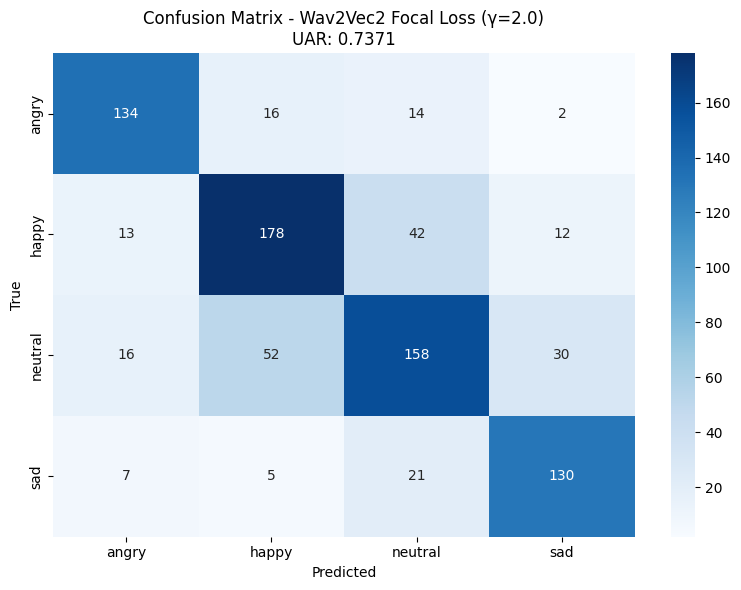

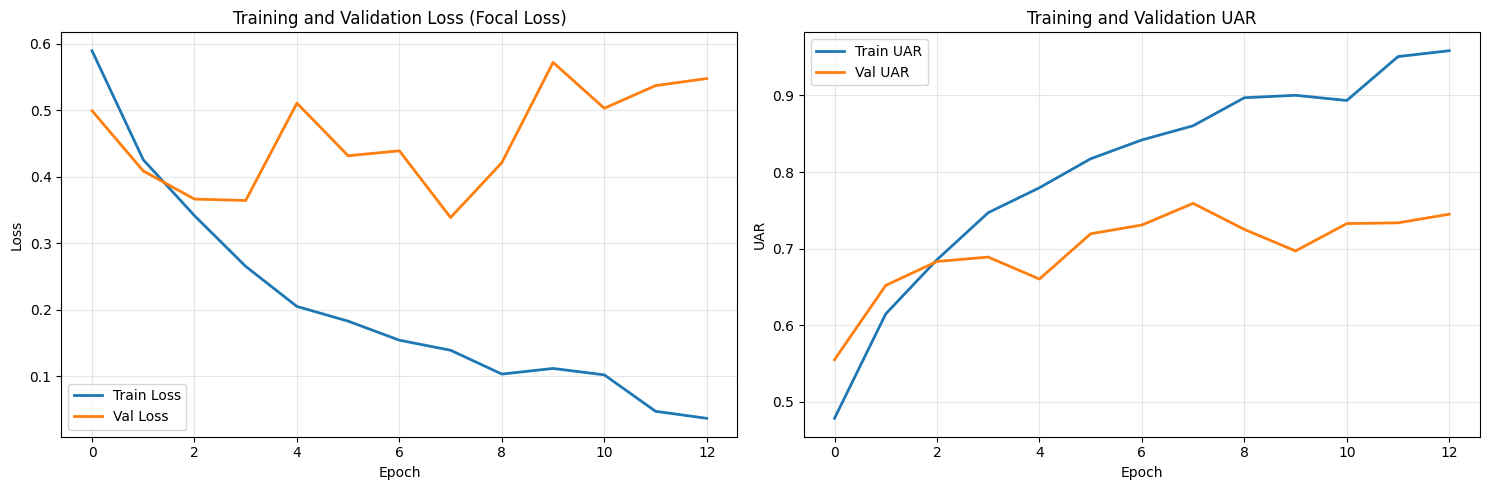


✅ Training complete!
✅ Model saved to 'wav2vec2_focal_emotion_model.pth'


In [ ]:
"""
Speech Emotion Recognition on IEMOCAP
Architecture: Transformer (Wav2Vec2)
Loss Function: Focal Loss (for handling class imbalance)
"""

# ============================================================================
# INSTALLATION
# ============================================================================
"""
!pip install kagglehub librosa soundfile matplotlib tqdm numpy pandas scikit-learn
!pip install transformers datasets torch accelerate
"""

import kagglehub
import librosa
import numpy as np
import pandas as pd
import os
import re
import warnings
from pathlib import Path
from tqdm import tqdm
from copy import deepcopy
warnings.filterwarnings('ignore')

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import Wav2Vec2Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report,
                            recall_score, f1_score, matthews_corrcoef)
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns

# ============================================================================
# CONFIGURATION
# ============================================================================

class Config:
    # Dataset
    DATASET_PATH = None
    TARGET_SR = 16000
    MAX_DURATION = 10.0
    EMOTIONS = ['angry', 'happy', 'neutral', 'sad']

    # Model
    WAV2VEC2_MODEL = 'facebook/wav2vec2-base'
    FREEZE_FEATURE_ENCODER = True
    HIDDEN_SIZE = 768

    # Training
    BATCH_SIZE = 8
    LEARNING_RATE = 1e-4
    NUM_EPOCHS = 15
    EARLY_STOPPING_PATIENCE = 5
    GRADIENT_ACCUMULATION_STEPS = 4
    DROPOUT = 0.3

    # Focal Loss parameters
    FOCAL_ALPHA = None  # Will be calculated from class weights
    FOCAL_GAMMA = 2.0   # Focusing parameter (higher = more focus on hard examples)

    # Data split
    TEST_SIZE = 0.15
    VAL_SIZE = 0.15

    # Device
    DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    RANDOM_SEED = 1337

# Set random seeds
torch.manual_seed(Config.RANDOM_SEED)
np.random.seed(Config.RANDOM_SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(Config.RANDOM_SEED)

# ============================================================================
# FOCAL LOSS IMPLEMENTATION
# ============================================================================

class FocalLoss(nn.Module):
    """
    Focal Loss for addressing class imbalance
    FL(p_t) = -alpha_t * (1 - p_t)^gamma * log(p_t)

    Args:
        alpha: Weighting factor for each class (tensor of shape [num_classes])
        gamma: Focusing parameter (default: 2.0)
        reduction: 'mean', 'sum', or 'none'
    """
    def __init__(self, alpha=None, gamma=2.0, reduction='mean'):
        super(FocalLoss, self).__init__()
        self.alpha = alpha
        self.gamma = gamma
        self.reduction = reduction

    def forward(self, inputs, targets):
        """
        Args:
            inputs: (batch_size, num_classes) - raw logits
            targets: (batch_size,) - class indices
        """
        # Get probabilities
        ce_loss = F.cross_entropy(inputs, targets, reduction='none')
        p_t = torch.exp(-ce_loss)

        # Apply focal term: (1 - p_t)^gamma
        focal_term = (1 - p_t) ** self.gamma

        # Apply alpha weighting if provided
        if self.alpha is not None:
            if self.alpha.device != inputs.device:
                self.alpha = self.alpha.to(inputs.device)
            alpha_t = self.alpha[targets]
            focal_loss = alpha_t * focal_term * ce_loss
        else:
            focal_loss = focal_term * ce_loss

        # Apply reduction
        if self.reduction == 'mean':
            return focal_loss.mean()
        elif self.reduction == 'sum':
            return focal_loss.sum()
        else:
            return focal_loss

# ============================================================================
# DATA LOADING
# ============================================================================

def load_iemocap_data(dataset_path):
    """
    Load IEMOCAP by parsing EmoEvaluation annotation files.
    IEMOCAP stores emotions in separate .txt files, not in wav filenames.
    This is the CORRECT way to load IEMOCAP data.
    """
    emotion_map = {'ang': 'angry', 'hap': 'happy', 'exc': 'happy',
                   'sad': 'sad', 'neu': 'neutral'}

    # Dictionary to store utterance_id -> emotion mapping
    utterance_emotions = {}

    # Find and parse all EmoEvaluation files
    print("Parsing emotion annotation files...")
    eval_files_found = 0

    for root, dirs, fnames in os.walk(dataset_path):
        for f in fnames:
            # Look for evaluation files in EmoEvaluation folders
            if f.endswith('.txt') and 'EmoEvaluation' in root:
                eval_files_found += 1
                eval_path = os.path.join(root, f)

                try:
                    with open(eval_path, 'r', errors='ignore') as ef:
                        for line in ef:
                            # Pattern: [start - end] utterance_id emotion [v, a, d]
                            match = re.match(
                                r'\[[\d\.]+ - [\d\.]+\]\s+(\S+)\s+(ang|hap|exc|sad|neu|fru|sur|fea|dis|xxx|oth)',
                                line.strip()
                            )
                            if match:
                                utt_id = match.group(1)
                                emotion = match.group(2).lower()
                                if emotion in emotion_map:
                                    utterance_emotions[utt_id] = emotion_map[emotion]
                except Exception as e:
                    continue

    print(f"Found {eval_files_found} evaluation files")
    print(f"Parsed {len(utterance_emotions)} utterance labels")

    # Now find corresponding wav files
    print("Matching wav files with labels...")
    wav_files_dict = {}

    for root, dirs, fnames in os.walk(dataset_path):
        for f in fnames:
            if f.endswith('.wav'):
                # Get utterance ID (filename without extension)
                utt_id = f.replace('.wav', '')
                wav_files_dict[utt_id] = os.path.join(root, f)

    print(f"Found {len(wav_files_dict)} wav files")

    # Match wav files with emotions and load audio
    data = []
    print("Loading audio files...")

    for utt_id, emotion in tqdm(utterance_emotions.items(), desc="Processing"):
        if utt_id not in wav_files_dict:
            continue

        if emotion not in Config.EMOTIONS:
            continue

        filepath = wav_files_dict[utt_id]

        # Load audio
        try:
            audio, sr = librosa.load(filepath, sr=Config.TARGET_SR, mono=True)

            # Normalize
            audio = (audio - np.mean(audio)) / (np.std(audio) + 1e-5)

            # Trim silence
            audio, _ = librosa.effects.trim(audio, top_db=20)

            # Truncate if too long
            max_samples = int(Config.MAX_DURATION * Config.TARGET_SR)
            if len(audio) > max_samples:
                audio = audio[:max_samples]

            # Extract session ID for potential session-based splitting
            session_match = re.search(r'Ses0([1-5])', filepath)
            session_id = int(session_match.group(1)) if session_match else None

            data.append({
                'filepath': filepath,
                'utterance_id': utt_id,
                'audio': audio,
                'sr': sr,
                'duration': len(audio) / sr,
                'emotion': emotion,
                'session_id': session_id
            })

        except Exception as e:
            continue

    print(f"Successfully loaded {len(data)} samples")

    # Class distribution
    if data:
        emotions_list = [d['emotion'] for d in data]
        unique, counts = np.unique(emotions_list, return_counts=True)
        print("\nClass distribution:")
        for emotion, count in zip(unique, counts):
            print(f"  {emotion}: {count}")

    return data

# ============================================================================
# DATASET CLASS
# ============================================================================

class EmotionDataset(Dataset):
    def __init__(self, data, label_encoder):
        self.data = data
        self.label_encoder = label_encoder

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        item = self.data[idx]
        audio = item['audio']
        label = self.label_encoder.transform([item['emotion']])[0]

        return {
            'features': torch.FloatTensor(audio),
            'label': torch.tensor(label, dtype=torch.long),
            'emotion': item['emotion']
        }

def collate_fn_wav2vec(batch):
    """Collate with padding"""
    max_len = max([item['features'].shape[0] for item in batch])

    features_list = []
    labels = []
    attention_masks = []

    for item in batch:
        feat = item['features']
        padding_length = max_len - feat.shape[0]

        if padding_length > 0:
            padded_feat = torch.cat([feat, torch.zeros(padding_length)])
            attention_mask = torch.cat([torch.ones(feat.shape[0]),
                                       torch.zeros(padding_length)])
        else:
            padded_feat = feat
            attention_mask = torch.ones(feat.shape[0])

        features_list.append(padded_feat)
        labels.append(item['label'])
        attention_masks.append(attention_mask)

    return {
        'features': torch.stack(features_list),
        'labels': torch.stack(labels),
        'attention_mask': torch.stack(attention_masks)
    }

# ============================================================================
# MODEL
# ============================================================================

class Wav2Vec2ForEmotionRecognition(nn.Module):
    """Wav2vec2 for emotion recognition"""

    def __init__(self, num_labels):
        super().__init__()

        self.wav2vec2 = Wav2Vec2Model.from_pretrained(Config.WAV2VEC2_MODEL)

        if Config.FREEZE_FEATURE_ENCODER:
            self.wav2vec2.feature_extractor.eval()
            for param in self.wav2vec2.feature_extractor.parameters():
                param.requires_grad = False

        hidden_size = self.wav2vec2.config.hidden_size

        self.classifier = nn.Sequential(
            nn.Dropout(Config.DROPOUT),
            nn.Linear(hidden_size, hidden_size),
            nn.Tanh(),
            nn.Dropout(Config.DROPOUT),
            nn.Linear(hidden_size, num_labels)
        )

    def _get_feat_extract_output_lengths(self, input_lengths):
        def _conv_out_length(input_length, kernel_size, stride):
            return (input_length - kernel_size) // stride + 1

        for kernel_size, stride in zip([10, 3, 3, 3, 3, 2, 2], [5, 2, 2, 2, 2, 2, 2]):
            input_lengths = _conv_out_length(input_lengths, kernel_size, stride)

        return input_lengths

    def forward(self, input_values, attention_mask=None):
        if Config.FREEZE_FEATURE_ENCODER:
            self.wav2vec2.feature_extractor.eval()

        outputs = self.wav2vec2(
            input_values,
            attention_mask=attention_mask,
            output_hidden_states=True
        )

        hidden_states = outputs.last_hidden_state

        # Mean pooling with mask
        if attention_mask is not None:
            batch_size = hidden_states.shape[0]
            input_lengths = attention_mask.sum(-1)
            output_lengths = self._get_feat_extract_output_lengths(input_lengths)

            max_len = hidden_states.shape[1]
            mask = torch.arange(max_len, device=hidden_states.device)[None, :] < output_lengths[:, None]
            mask = mask.unsqueeze(-1).expand(hidden_states.size()).float()

            masked_hidden = hidden_states * mask
            sum_hidden = masked_hidden.sum(dim=1)
            sum_mask = mask.sum(dim=1)
            mean_hidden = sum_hidden / (sum_mask + 1e-9)
        else:
            mean_hidden = hidden_states.mean(dim=1)

        logits = self.classifier(mean_hidden)
        return logits

# ============================================================================
# TRAINING
# ============================================================================

def calculate_focal_alpha(data, label_encoder):
    """Calculate alpha weights for Focal Loss"""
    emotions = [d['emotion'] for d in data]
    labels = label_encoder.transform(emotions)

    class_counts = np.bincount(labels)
    total_samples = len(labels)
    n_classes = len(class_counts)

    # Calculate alpha as inverse frequency (normalized)
    alpha = total_samples / (n_classes * class_counts)

    # Normalize so they sum to n_classes
    alpha = alpha / alpha.sum() * n_classes

    alpha = torch.FloatTensor(alpha).to(Config.DEVICE)

    print("\nFocal Loss Alpha weights:")
    for i, emotion in enumerate(Config.EMOTIONS):
        print(f"  {emotion}: {alpha[i]:.4f} (count: {class_counts[i]})")

    return alpha

def train_epoch(model, dataloader, optimizer, criterion, device):
    """Train one epoch"""
    model.train()

    if Config.FREEZE_FEATURE_ENCODER:
        model.wav2vec2.feature_extractor.eval()

    total_loss = 0
    predictions = []
    true_labels = []

    optimizer.zero_grad()
    pbar = tqdm(dataloader, desc="Training", leave=False)

    for batch_idx, batch in enumerate(pbar):
        features = batch['features'].to(device)
        labels = batch['labels'].to(device)
        attention_mask = batch['attention_mask'].to(device)

        logits = model(features, attention_mask=attention_mask)
        loss = criterion(logits, labels)

        loss = loss / Config.GRADIENT_ACCUMULATION_STEPS
        loss.backward()

        if (batch_idx + 1) % Config.GRADIENT_ACCUMULATION_STEPS == 0:
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            optimizer.zero_grad()

        total_loss += loss.item() * Config.GRADIENT_ACCUMULATION_STEPS

        preds = torch.argmax(logits, dim=1)
        predictions.extend(preds.cpu().numpy())
        true_labels.extend(labels.cpu().numpy())

        pbar.set_postfix({
            'loss': f'{total_loss/(batch_idx+1):.4f}',
            'acc': f'{accuracy_score(true_labels, predictions):.4f}'
        })

    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(true_labels, predictions)
    uar = recall_score(true_labels, predictions, average='macro')

    return avg_loss, accuracy, uar

def evaluate(model, dataloader, criterion, device):
    """Evaluate model"""
    model.eval()
    total_loss = 0
    predictions = []
    true_labels = []

    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating", leave=False):
            features = batch['features'].to(device)
            labels = batch['labels'].to(device)
            attention_mask = batch['attention_mask'].to(device)

            logits = model(features, attention_mask=attention_mask)
            loss = criterion(logits, labels)

            total_loss += loss.item()

            preds = torch.argmax(logits, dim=1)
            predictions.extend(preds.cpu().numpy())
            true_labels.extend(labels.cpu().numpy())

    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(true_labels, predictions)
    uar = recall_score(true_labels, predictions, average='macro')

    return avg_loss, accuracy, uar, predictions, true_labels

# ============================================================================
# MAIN TRAINING FUNCTION
# ============================================================================

def train_model(data, label_encoder):
    """Main training function"""
    print("\n" + "="*80)
    print("Training Wav2Vec2 with Focal Loss")
    print("="*80)

    # Calculate focal loss alpha weights
    focal_alpha = calculate_focal_alpha(data, label_encoder)

    # Split data
    train_val_data, test_data = train_test_split(
        data,
        test_size=Config.TEST_SIZE,
        stratify=[d['emotion'] for d in data],
        random_state=Config.RANDOM_SEED
    )

    train_data, val_data = train_test_split(
        train_val_data,
        test_size=Config.VAL_SIZE / (1 - Config.TEST_SIZE),
        stratify=[d['emotion'] for d in train_val_data],
        random_state=Config.RANDOM_SEED
    )

    print(f"\nData split:")
    print(f"  Train: {len(train_data)} ({len(train_data)/len(data)*100:.1f}%)")
    print(f"  Val:   {len(val_data)} ({len(val_data)/len(data)*100:.1f}%)")
    print(f"  Test:  {len(test_data)} ({len(test_data)/len(data)*100:.1f}%)")

    # Create datasets
    train_dataset = EmotionDataset(train_data, label_encoder)
    val_dataset = EmotionDataset(val_data, label_encoder)
    test_dataset = EmotionDataset(test_data, label_encoder)

    # Weighted sampler for balanced training
    train_labels = label_encoder.transform([d['emotion'] for d in train_data])
    class_counts = np.bincount(train_labels)
    sample_weights = (1.0 / class_counts)[train_labels]

    sampler = torch.utils.data.WeightedRandomSampler(
        weights=sample_weights,
        num_samples=len(sample_weights),
        replacement=True
    )

    # Dataloaders
    train_loader = DataLoader(
        train_dataset,
        batch_size=Config.BATCH_SIZE,
        sampler=sampler,
        collate_fn=collate_fn_wav2vec,
        num_workers=2
    )

    val_loader = DataLoader(
        val_dataset,
        batch_size=Config.BATCH_SIZE,
        shuffle=False,
        collate_fn=collate_fn_wav2vec,
        num_workers=2
    )

    test_loader = DataLoader(
        test_dataset,
        batch_size=Config.BATCH_SIZE,
        shuffle=False,
        collate_fn=collate_fn_wav2vec,
        num_workers=2
    )

    # Model, optimizer, loss
    model = Wav2Vec2ForEmotionRecognition(len(Config.EMOTIONS)).to(Config.DEVICE)
    optimizer = torch.optim.AdamW(model.parameters(), lr=Config.LEARNING_RATE, weight_decay=0.01)
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.5, patience=2)

    # Use Focal Loss instead of Cross Entropy
    criterion = FocalLoss(alpha=focal_alpha, gamma=Config.FOCAL_GAMMA, reduction='mean')
    print(f"\nUsing Focal Loss with gamma={Config.FOCAL_GAMMA}")

    # Training loop
    best_val_uar = 0
    best_epoch = 0
    patience_counter = 0
    best_model_state = None

    history = {
        'train_loss': [], 'train_acc': [], 'train_uar': [],
        'val_loss': [], 'val_acc': [], 'val_uar': []
    }

    for epoch in range(Config.NUM_EPOCHS):
        print(f"\nEpoch {epoch+1}/{Config.NUM_EPOCHS}")
        print("-" * 60)

        train_loss, train_acc, train_uar = train_epoch(model, train_loader, optimizer, criterion, Config.DEVICE)
        val_loss, val_acc, val_uar, val_preds, val_labels = evaluate(model, val_loader, criterion, Config.DEVICE)

        scheduler.step(val_uar)

        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)
        history['train_uar'].append(train_uar)
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        history['val_uar'].append(val_uar)

        print(f"TRAIN → Loss: {train_loss:.4f} | Acc: {train_acc:.4f} | UAR: {train_uar:.4f}")
        print(f"VAL   → Loss: {val_loss:.4f} | Acc: {val_acc:.4f} | UAR: {val_uar:.4f}")

        if val_uar > best_val_uar:
            best_val_uar = val_uar
            best_epoch = epoch
            best_model_state = deepcopy(model.state_dict())
            patience_counter = 0
            print(f"✅ NEW BEST! Val UAR: {best_val_uar:.4f}")
        else:
            patience_counter += 1
            print(f"⏳ Patience: {patience_counter}/{Config.EARLY_STOPPING_PATIENCE}")

        if patience_counter >= Config.EARLY_STOPPING_PATIENCE:
            print(f"\n🛑 Early stopping at epoch {epoch+1}")
            break

    # Load best model and evaluate on test
    model.load_state_dict(best_model_state)
    test_loss, test_acc, test_uar, test_preds, test_labels = evaluate(
        model, test_loader, criterion, Config.DEVICE
    )

    # Final metrics
    f1 = f1_score(test_labels, test_preds, average='macro')
    mcc = matthews_corrcoef(test_labels, test_preds)

    print(f"\n{'='*80}")
    print("FINAL RESULTS")
    print(f"{'='*80}")
    print(f"Best model from Epoch {best_epoch+1}")
    print(f"Test UAR: {test_uar:.4f}")
    print(f"Test Accuracy: {test_acc:.4f}")
    print(f"Test F1-Macro: {f1:.4f}")
    print(f"Test MCC: {mcc:.4f}")

    print("\nClassification Report:")
    print(classification_report(test_labels, test_preds, target_names=Config.EMOTIONS, digits=4))

    # Confusion matrix
    cm = confusion_matrix(test_labels, test_preds)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=Config.EMOTIONS, yticklabels=Config.EMOTIONS)
    plt.title(f'Confusion Matrix - Wav2Vec2 Focal Loss (γ={Config.FOCAL_GAMMA})\nUAR: {test_uar:.4f}')
    plt.ylabel('True')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.savefig('wav2vec2_focal_confusion_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Plot training history
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Loss plot
    axes[0].plot(history['train_loss'], label='Train Loss', linewidth=2)
    axes[0].plot(history['val_loss'], label='Val Loss', linewidth=2)
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss')
    axes[0].set_title('Training and Validation Loss (Focal Loss)')
    axes[0].legend()
    axes[0].grid(alpha=0.3)

    # UAR plot
    axes[1].plot(history['train_uar'], label='Train UAR', linewidth=2)
    axes[1].plot(history['val_uar'], label='Val UAR', linewidth=2)
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('UAR')
    axes[1].set_title('Training and Validation UAR')
    axes[1].legend()
    axes[1].grid(alpha=0.3)

    plt.tight_layout()
    plt.savefig('wav2vec2_focal_training_history.png', dpi=300, bbox_inches='tight')
    plt.show()

    return model, history

# ============================================================================
# RUN TRAINING
# ============================================================================

if __name__ == "__main__":
    # Download dataset
    print("Downloading IEMOCAP dataset...")
    path = kagglehub.dataset_download("dejolilandry/iemocapfullrelease")
    Config.DATASET_PATH = path
    print(f"Dataset path: {path}")

    # Load data using the FIXED loader
    print("\n" + "="*80)
    print("Loading IEMOCAP Dataset")
    print("="*80)
    data = load_iemocap_data(path)

    if not data:
        print("ERROR: No data loaded!")
        print("\nTroubleshooting:")
        print("1. Check if EmoEvaluation folders exist in the dataset")
        print("2. Verify .txt annotation files are present")
        print("3. Ensure .wav files are in the correct structure")
    else:
        # Create DataFrame for statistics
        df = pd.DataFrame(data)
        print("\n" + "="*80)
        print("Dataset Statistics")
        print("="*80)
        print(f"Total samples: {len(df)}")
        print(f"\nEmotion distribution:")
        print(df['emotion'].value_counts())
        print(f"\nAverage duration: {df['duration'].mean():.2f}s")
        print(f"Duration range: [{df['duration'].min():.2f}s, {df['duration'].max():.2f}s]")

        # Prepare labels
        label_encoder = LabelEncoder()
        label_encoder.fit(Config.EMOTIONS)

        # Train
        model, history = train_model(data, label_encoder)

        # Save model
        torch.save({
            'model_state_dict': model.state_dict(),
            'config': Config,
            'label_encoder': label_encoder,
            'history': history
        }, 'wav2vec2_focal_emotion_model.pth')

        print("\n✅ Training complete!")
        print("✅ Model saved to 'wav2vec2_focal_emotion_model.pth'")

In [ ]:
from google.colab import files
files.download('wav2vec2_focal_emotion_model.pth')
print("✅ Model downloaded as 'wav2vec2_focal_emotion_model.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Model downloaded as 'wav2vec2_focal_emotion_model.pth
